In [163]:
### Importing necessary libraries ###

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline
import seaborn as sns 
import scipy.stats  as stats
import statsmodels.api as sm


### Importing the reviews for all thriller movies from 2017-2021

In [40]:
Thriller_url ="https://raw.githubusercontent.com/ddb336/CSS-IMDb-Dataset/main/Data/genres-combined/Thriller_reviews_combined.csv"

In [41]:
thriller = pd.read_csv(Thriller_url)

thriller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20373 entries, 0 to 20372
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title_id                      20373 non-null  object 
 1   review_title                  20373 non-null  object 
 2   review_title_sentiment_score  20373 non-null  float64
 3   review_text_sentiment_score   20373 non-null  float64
 4   date                          20373 non-null  object 
 5   rating                        20373 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 955.1+ KB


In [42]:
thriller.head()

,title_id,review_title,review_title_sentiment_score,review_text_sentiment_score,date,rating
0,tt2267998,Interesting end\n,0.4019,0.9810,2021-03-28 00:00:00,9
1,tt2267998,A masterpiece\n,0.6249,0.0000,2021-03-20 00:00:00,10
2,tt2267998,Ending sucked Unfortunately\n,-0.6597,-0.9966,2021-03-19 00:00:00,6
3,tt2267998,impressive film that guides the audience\n,0.5106,0.9258,2021-03-18 00:00:00,9
4,tt2267998,Great movie but I am pissed off\n,-0.6428,-0.9159,2021-03-18 00:00:00,9


### Data Filtering

#### Fixing the 'date' column

In [43]:
## Chekcing the date column as it is an important independent variable in our research
thriller['date']

0        2021-03-28 00:00:00
1        2021-03-20 00:00:00
2        2021-03-19 00:00:00
3        2021-03-18 00:00:00
4        2021-03-18 00:00:00
                ...         
20368    2018-07-16 00:00:00
20369    2018-05-13 00:00:00
20370    2017-08-25 00:00:00
20371    2017-04-02 00:00:00
20372    2017-03-08 00:00:00
Name: date, Length: 20373, dtype: object

In [44]:
thriller['date'] = pd.to_datetime(thriller['date'])

# thriller['date'] = pd.DatetimeIndex(thriller['date']).year
# thriller['date'] = pd.to_datetime(thriller['date'],format='%m%Y', errors='coerce')



In [45]:
thriller.head()

,title_id,review_title,review_title_sentiment_score,review_text_sentiment_score,date,rating
0,tt2267998,Interesting end\n,0.4019,0.9810,2021-03-28,9
1,tt2267998,A masterpiece\n,0.6249,0.0000,2021-03-20,10
2,tt2267998,Ending sucked Unfortunately\n,-0.6597,-0.9966,2021-03-19,6
3,tt2267998,impressive film that guides the audience\n,0.5106,0.9258,2021-03-18,9
4,tt2267998,Great movie but I am pissed off\n,-0.6428,-0.9159,2021-03-18,9


In [46]:
thriller.dtypes

title_id                                object
review_title                            object
review_title_sentiment_score           float64
review_text_sentiment_score            float64
date                            datetime64[ns]
rating                                   int64
dtype: object

#### Fixing the sentiment analysis columns

In [47]:
thriller.rename(columns={'review_title_sentiment_score': 'title_score', 'review_text_sentiment_score': 'text_score'},inplace=True)

In [88]:
thriller.head()

,title_id,review_title,title_score,text_score,date,rating
0,tt2267998,Interesting end\n,0.4019,0.9810,2021-03-28,9
1,tt2267998,A masterpiece\n,0.6249,0.0000,2021-03-20,10
2,tt2267998,Ending sucked Unfortunately\n,-0.6597,-0.9966,2021-03-19,6
3,tt2267998,impressive film that guides the audience\n,0.5106,0.9258,2021-03-18,9
4,tt2267998,Great movie but I am pissed off\n,-0.6428,-0.9159,2021-03-18,9


In [49]:
thriller.dtypes

title_id                object
review_title            object
title_score            float64
text_score             float64
date            datetime64[ns]
rating                   int64
dtype: object

In [211]:
thriller

,title_id,review_title,title_score,text_score,date,rating,year,month
0,tt2267998,Interesting end\n,0.4019,0.9810,2021-03-28,9,2021,3
1,tt2267998,A masterpiece\n,0.6249,0.0000,2021-03-20,10,2021,3
2,tt2267998,Ending sucked Unfortunately\n,-0.6597,-0.9966,2021-03-19,6,2021,3
3,tt2267998,impressive film that guides the audience\n,0.5106,0.9258,2021-03-18,9,2021,3
4,tt2267998,Great movie but I am pissed off\n,-0.6428,-0.9159,2021-03-18,9,2021,3
...,...,...,...,...,...,...,...,...
20368,tt3862750,TOO GOOD TO BE TRUE\n,0.6908,0.0036,2018-07-16,6,2018,7
20369,tt3862750,Great thriller\n,0.6705,0.6249,2018-05-13,9,2018,5
20370,tt3862750,"Not bad, not good, just meh....\n",0.5981,0.8568,2017-08-25,5,2017,8
20371,tt3862750,The Imperfect Guise\n,-0.3182,0.9873,2017-04-02,6,2017,4


In [335]:
# thriller['date'] = thriller['date'].values.astype(float)

In [337]:
# df = thriller[(thriller['date'] > '2020-3-1') & (thriller['date'] <= '2020-3-31')]


In [338]:
# df

,title_id,review_title,review_title_sentiment_score,review_text_sentiment_score,date,rating
175,tt2267998,gone girl\n,0.0000,0.2263,2020-03-31,9
176,tt2267998,Hot\n,0.0000,0.3612,2020-03-31,10
177,tt2267998,Watching this movie made me feel sick\n,-0.5106,-0.7100,2020-03-30,2
178,tt2267998,Thought-provoking\n,0.0000,0.9937,2020-03-30,8
179,tt2267998,Fair but not fair enough\n,-0.2006,0.6808,2020-03-28,8
...,...,...,...,...,...,...
20126,tt2180994,Entertaining\n,0.4404,0.9633,2020-03-02,8
20127,tt2180994,A Good Marriage = A Bad Movie\n,-0.1531,0.7935,2020-03-02,3
20160,tt3896738,Australian gem about a sexual-predator serial...,-0.6486,-0.9531,2020-03-09,7
20238,tt4382872,Great Fight Scenes\n,0.3612,0.5994,2020-03-18,9


In [181]:
thriller.dtypes

title_id                object
review_title            object
title_score            float64
text_score             float64
date            datetime64[ns]
rating                   int64
year                     int64
month                    int64
dtype: object

### Getting data on monthly and yearly basis

<AxesSubplot:xlabel='year,month'>

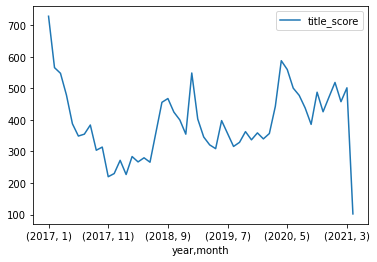

In [239]:
count = thriller.groupby(['year','month']).count()
count.plot(y='title_score')

<AxesSubplot:xlabel='month'>

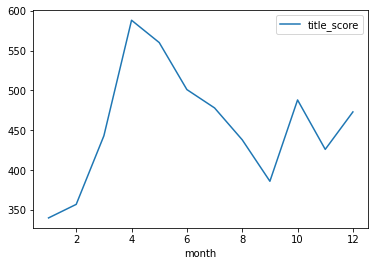

In [234]:
count.xs(key=2020,axis=0,level='year').plot(y='title_score')

In [224]:
thriller['year']=thriller['date'].dt.year
thriller['month']=thriller['date'].dt.month
t = thriller.groupby(['year','month']).mean()

In [186]:
thriller['year']=thriller['date'].dt.year
thriller['month']=thriller['date'].dt.month
m = thriller.groupby(['year','month']).std()

<AxesSubplot:xlabel='month'>

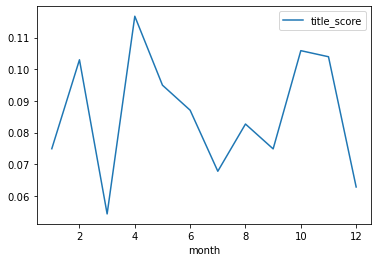

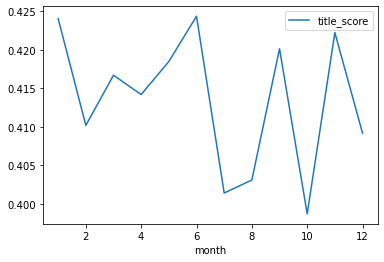

In [202]:
t.xs(key=2020,axis=0,level='year').plot(y='title_score')
m.xs(key=2020,axis=0,level='year').plot(y='title_score')

## Visualizations

In [204]:
thriller

,title_id,review_title,title_score,text_score,date,rating,year,month
0,tt2267998,Interesting end\n,0.4019,0.9810,2021-03-28,9,2021,3
1,tt2267998,A masterpiece\n,0.6249,0.0000,2021-03-20,10,2021,3
2,tt2267998,Ending sucked Unfortunately\n,-0.6597,-0.9966,2021-03-19,6,2021,3
3,tt2267998,impressive film that guides the audience\n,0.5106,0.9258,2021-03-18,9,2021,3
4,tt2267998,Great movie but I am pissed off\n,-0.6428,-0.9159,2021-03-18,9,2021,3
...,...,...,...,...,...,...,...,...
20368,tt3862750,TOO GOOD TO BE TRUE\n,0.6908,0.0036,2018-07-16,6,2018,7
20369,tt3862750,Great thriller\n,0.6705,0.6249,2018-05-13,9,2018,5
20370,tt3862750,"Not bad, not good, just meh....\n",0.5981,0.8568,2017-08-25,5,2017,8
20371,tt3862750,The Imperfect Guise\n,-0.3182,0.9873,2017-04-02,6,2017,4


<Figure size 864x432 with 0 Axes>

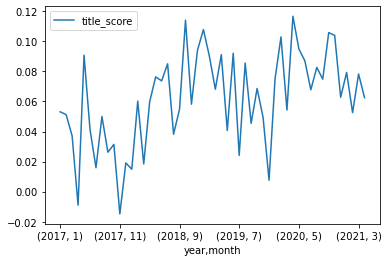

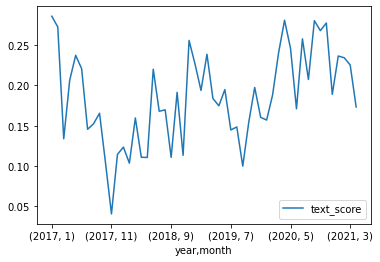

In [198]:
## Plotting title and text scores
plt.figure(figsize=(12,6))
t.plot(y='title_score')
t.plot(y='text_score')
plt.legend()

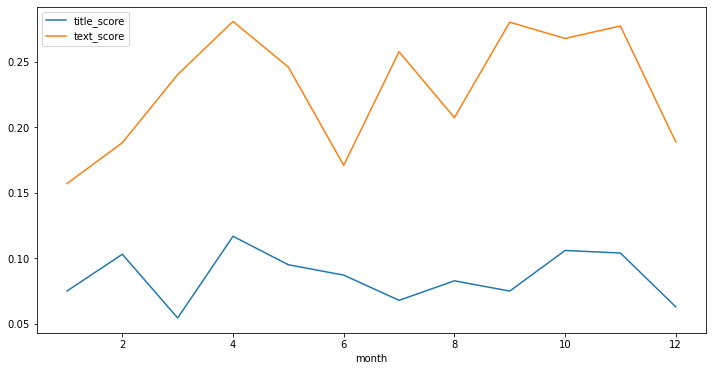

In [201]:
plt.figure(figsize=(12,6))
t.xs(key=2020,axis=0,level='year')['title_score'].plot(label='title_score')
t.xs(key=2020,axis=0,level='year')['text_score'].plot(label='text_score')
plt.legend()

In [21]:
### Testing for overall changes in mood and reviews over time 

In [37]:
# thriller['date'].loc["2020-03-31"]


In [184]:
# sns.barplot(x='date',y='text_score',data=thriller)

In [17]:
# fig = plt.figure(figsize=(120,120))
# sns.barplot(x='date',y='review_text_sentiment_score',data=thriller)
# plt.xticks(rotation=50)
# plt.tight_layout()

In [18]:
# fig = plt.figure(figsize=(12,12))
# sns.barplot(x='date',y='text_score',data=df)
# plt.xticks(rotation=50)
# plt.tight_layout()

In [ ]:
# fig = plt.figure(figsize=(12,12))
# sns.barplot(x='date',y='text_score',data=thriller)
# plt.xticks(rotation=50)
# plt.tight_layout()

In [19]:
# fig = plt.figure(figsize=(12,12))
# # plt.scatter('date','review_title_sentiment_score',data=thriller['date'].loc[])
# sns.distplot(thriller['data'].loc['2020-01-01':'2020-12-31'],color='green',bins=100)
# # sns.clustermap(data=thriller)
# plt.xticks(rotation=50)

## Robustness of data

In [153]:
thriller.corr()

,title_score,text_score,rating,year,month
title_score,1.000000,0.326019,0.412286,0.038142,-0.006232
text_score,0.326019,1.000000,0.441208,0.025683,-0.020261
rating,0.412286,0.441208,1.000000,0.026794,-0.006165
year,0.038142,0.025683,0.026794,1.000000,-0.080789
month,-0.006232,-0.020261,-0.006165,-0.080789,1.000000


In [169]:
y=thriller['text_score']
x=thriller['title_score']
text_title = sm.OLS(y,x, intercept=True)
# vix_on_gdp = pd.ols(y=df['VIXCLS'], x=df['GDP'], intercept=True)
results = text_title.fit()

results.params

title_score    0.65434
dtype: float64

In [173]:
print(results.t_test(1))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.6543      0.012     53.396      0.000       0.630       0.678


In [177]:
y1=thriller['text_score']
x1=thriller['rating']
text_rating = sm.OLS(y1,x1, intercept=True)
# vix_on_gdp = pd.ols(y=df['VIXCLS'], x=df['GDP'], intercept=True)
results1 =text_rating.fit()

results1.params

rating    0.047084
dtype: float64

In [178]:
print(results1.t_test(1))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0471      0.001     63.812      0.000       0.046       0.049
